In [7]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import matplotlib

### Load Data and Create Graph

First, we will load the data frame using pandas, and then we can create the graph using networkx. In this case, we're firstly interested in which users reviewed which product. Therefore, we're using userId as nodes and productId as edges.

Additionally, we will pick a random sample of 15,000 rows for computational purposes, since this dataset has over 500,000 rows initially.

In [8]:
#Load Data
finefood = pd.read_csv('/Users/Lucas/Documents/CUNY/DATA620/finefoods.csv')
finefood = finefood.sample(n=15000, random_state=958)

foodnx = nx.from_pandas_edgelist(finefood, 'userId', 'productId')

### Graph connections

Because the graph is not fully connected, we need to pick a "cluster" of connected components to compute the diameter. For this, we can list the connected components, and in this case we're just going to pick the largest one.

In [9]:
#Check for full connection
is_connected = nx.is_connected(foodnx)
print(f'Graph connection: {is_connected}')

#Find all connected components
components = list(nx.connected_components(foodnx))

#Get the largest component
largest_component = max(components, key=len)
print(f'The largest component has {len(largest_component)} nodes.')

#Create a subgraph of the largest component
foodnx_sub = foodnx.subgraph(largest_component)

Graph connection: False
The largest component has 1590 nodes.


### Diameter

Next, we calculate the diameter of the largest component of 1,630 nodes.

In [10]:
#Analyze Diameter
diameter = nx.diameter(foodnx_sub)
print('Diameter:', diameter)

Diameter: 36


The Diameter is 51. This tell us that the longest ever walk we could do would be 51 nodes. Given that we have 1,630 nodes, this points to a relatively efficient graph, such as small-world networks. It is likely quite connected.

In order to increase our intuition about this graph, we can additionally look at the closeness centrality and look at the top connected nodes. This will tell us not only which users made the most reviews, but also how many.

In [11]:
#Analyze closeness centrality
clo_centrality = nx.closeness_centrality(foodnx_sub)
sorted_clo = sorted(clo_centrality.items(), key=lambda item: item[1], reverse=True)
print('Top 5 Nodes by Closeness Centrality:', sorted_clo[:5])

Top 5 Nodes by Closeness Centrality: [('B0058AMY74', 0.11844949683190459), ('ADS5APY1NKTL4', 0.1172953421421717), ('A3ARZW7S96SESC', 0.11297547102737292), ('B005VOOM5E', 0.11236829078565873), ('B0061IUIDY', 0.11220958971824024)]


The users and products above appear to be the most central players in the network.

Next, we can get an actual visualization of the network to understand how it actually looks like.

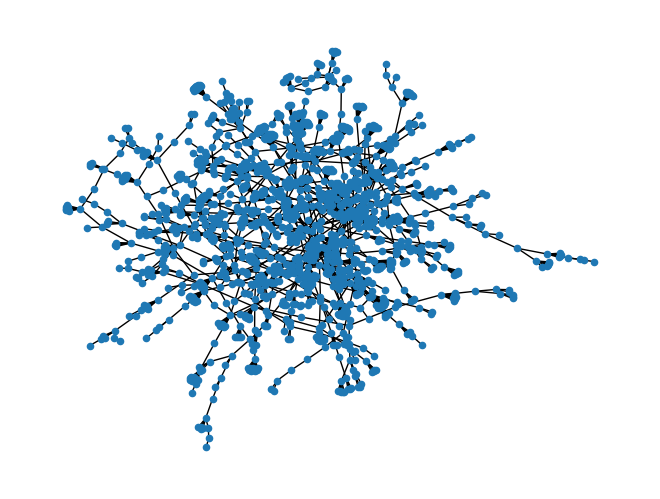

In [12]:
#Draw the graph
nx.draw(foodnx_sub, node_size=20)

Looking at the visualization, we can see that there are several "branches" that are on the side, which potentially appear to be specific niches of fine foods that Amazon offers. Generally, the network is well connected, and does not appear to have a hub-and-spoke shape, for example.